# Description

It plots the PCA computed previously on samples. It checks that samples from the European ancestry group are homogeneous, and writes a file to exclude later those that are not.

# Modules

In [1]:
library(tidyverse)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Paths

In [2]:
A1000G_GENOTYPES_DIR <- Sys.getenv("PHENOPLIER_A1000G_GENOTYPES_DIR")

In [3]:
A1000G_GENOTYPES_DIR

[1] "/opt/data/data/1000g/genotypes"

In [4]:
SUBSETS_DIR <- file.path(A1000G_GENOTYPES_DIR, "subsets")

In [5]:
SUBSETS_DIR

[1] "/opt/data/data/1000g/genotypes/subsets"

# Load data

In [6]:
data <- as.data.frame(read_table(file.path(SUBSETS_DIR, "all_phase3.6.pca_covar.eigenvec"), col_names=FALSE))


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  X2 = col_character()
)
ℹ Use `spec()` for the full column specifications.



In [7]:
dim(data)

[1] 2025   22

In [8]:
data <- rename(data, FID = X1, IID = X2)

In [9]:
head(data)

,FID,IID,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,HG00096,-0.0170777,-0.0297340,0.0139669,-0.0228490,5.16141e-04,0.00218617,-0.00278844,-0.0269690,⋯,0.000295257,0.000710122,5.30742e-05,0.000657756,-0.000469860,0.000626856,6.28458e-04,0.00106813,-0.000818642,0.001827620
2,0,HG00100,-0.0168660,-0.0306147,0.0131848,-0.0227318,-1.00077e-04,0.00159456,-0.00363550,-0.0290207,⋯,0.000759070,0.001922680,-1.30685e-03,0.001837260,0.000101892,0.001427810,8.82389e-04,0.00184488,-0.002192890,-0.002798840
3,0,HG00101,-0.0171058,-0.0294789,0.0136368,-0.0221563,5.05669e-04,0.00148662,-0.00297330,-0.0347485,⋯,0.001781400,0.000208624,-1.92679e-04,0.001120210,0.001287170,0.001449520,1.69528e-03,0.00125548,-0.000859963,-0.000704539
4,0,HG00102,-0.0173212,-0.0294713,0.0132886,-0.0219169,-7.06421e-05,0.00266495,-0.00300012,-0.0360389,⋯,0.001475530,-0.000558446,3.24685e-04,-0.000441190,-0.000063137,0.001421930,8.83353e-04,0.00133618,-0.001656420,0.000718980
5,0,HG00103,-0.0171220,-0.0292991,0.0136263,-0.0221872,1.87023e-04,0.00185839,-0.00275359,-0.0278848,⋯,0.002174860,-0.000309322,9.83283e-04,-0.000224062,0.000350049,-0.000192005,1.79637e-03,-0.00020419,0.000951061,-0.000170596
6,0,HG00105,-0.0170839,-0.0292877,0.0132401,-0.0218364,6.60075e-05,0.00246490,-0.00198479,-0.0300241,⋯,0.000609485,-0.001760740,1.29472e-03,-0.000962045,0.001485740,0.000197076,8.90638e-05,-0.00025314,-0.001458730,0.003326640


In [10]:
race <- as.data.frame(read_table(file.path(A1000G_GENOTYPES_DIR, "all_phase3.psam")))


── Column specification ────────────────────────────────────────────────────────
cols(
  `#IID` = col_character(),
  PAT = col_double(),
  MAT = col_double(),
  SEX = col_double(),
  SuperPop = col_character(),
  Population = col_character()
)

Warning message:
“8 parsing failures.
 row col expected  actual                                             file
1430 PAT a double HG03750 '/opt/data/data/1000g/genotypes/all_phase3.psam'
2252 PAT a double NA19904 '/opt/data/data/1000g/genotypes/all_phase3.psam'
2278 MAT a double NA20317 '/opt/data/data/1000g/genotypes/all_phase3.psam'
2279 MAT a double NA20321 '/opt/data/data/1000g/genotypes/all_phase3.psam'
2289 MAT a double NA20334 '/opt/data/data/1000g/genotypes/all_phase3.psam'
.... ... ........ ....... ................................................
See problems(...) for more details.
”


In [11]:
dim(race)

[1] 2504    6

In [12]:
race <- rename(race, IID = "#IID")

In [13]:
head(race)

,IID,PAT,MAT,SEX,SuperPop,Population
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,HG00096,0,0,1,EUR,GBR
2,HG00097,0,0,2,EUR,GBR
3,HG00099,0,0,2,EUR,GBR
4,HG00100,0,0,2,EUR,GBR
5,HG00101,0,0,1,EUR,GBR
6,HG00102,0,0,2,EUR,GBR


In [14]:
unique(race$SuperPop)

[1] "EUR" "EAS" "AMR" "SAS" "AFR"

# Plot

In [15]:
datafile <- merge(data, race, by=c("IID"))

In [16]:
dim(datafile)

[1] 2025   27

In [17]:
datafile <- rename(datafile, PC1 = X3, PC2 = X4)

In [18]:
head(datafile)

,IID,FID,PC1,PC2,X5,X6,X7,X8,X9,X10,⋯,X18,X19,X20,X21,X22,PAT,MAT,SEX,SuperPop,Population
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,HG00096,0,-0.0170777,-0.0297340,0.0139669,-0.0228490,5.16141e-04,0.00218617,-0.00278844,-0.0269690,⋯,0.000626856,6.28458e-04,0.00106813,-0.000818642,0.001827620,0,0,1,EUR,GBR
2,HG00100,0,-0.0168660,-0.0306147,0.0131848,-0.0227318,-1.00077e-04,0.00159456,-0.00363550,-0.0290207,⋯,0.001427810,8.82389e-04,0.00184488,-0.002192890,-0.002798840,0,0,2,EUR,GBR
3,HG00101,0,-0.0171058,-0.0294789,0.0136368,-0.0221563,5.05669e-04,0.00148662,-0.00297330,-0.0347485,⋯,0.001449520,1.69528e-03,0.00125548,-0.000859963,-0.000704539,0,0,1,EUR,GBR
4,HG00102,0,-0.0173212,-0.0294713,0.0132886,-0.0219169,-7.06421e-05,0.00266495,-0.00300012,-0.0360389,⋯,0.001421930,8.83353e-04,0.00133618,-0.001656420,0.000718980,0,0,2,EUR,GBR
5,HG00103,0,-0.0171220,-0.0292991,0.0136263,-0.0221872,1.87023e-04,0.00185839,-0.00275359,-0.0278848,⋯,-0.000192005,1.79637e-03,-0.00020419,0.000951061,-0.000170596,0,0,1,EUR,GBR
6,HG00105,0,-0.0170839,-0.0292877,0.0132401,-0.0218364,6.60075e-05,0.00246490,-0.00198479,-0.0300241,⋯,0.000197076,8.90638e-05,-0.00025314,-0.001458730,0.003326640,0,0,1,EUR,GBR


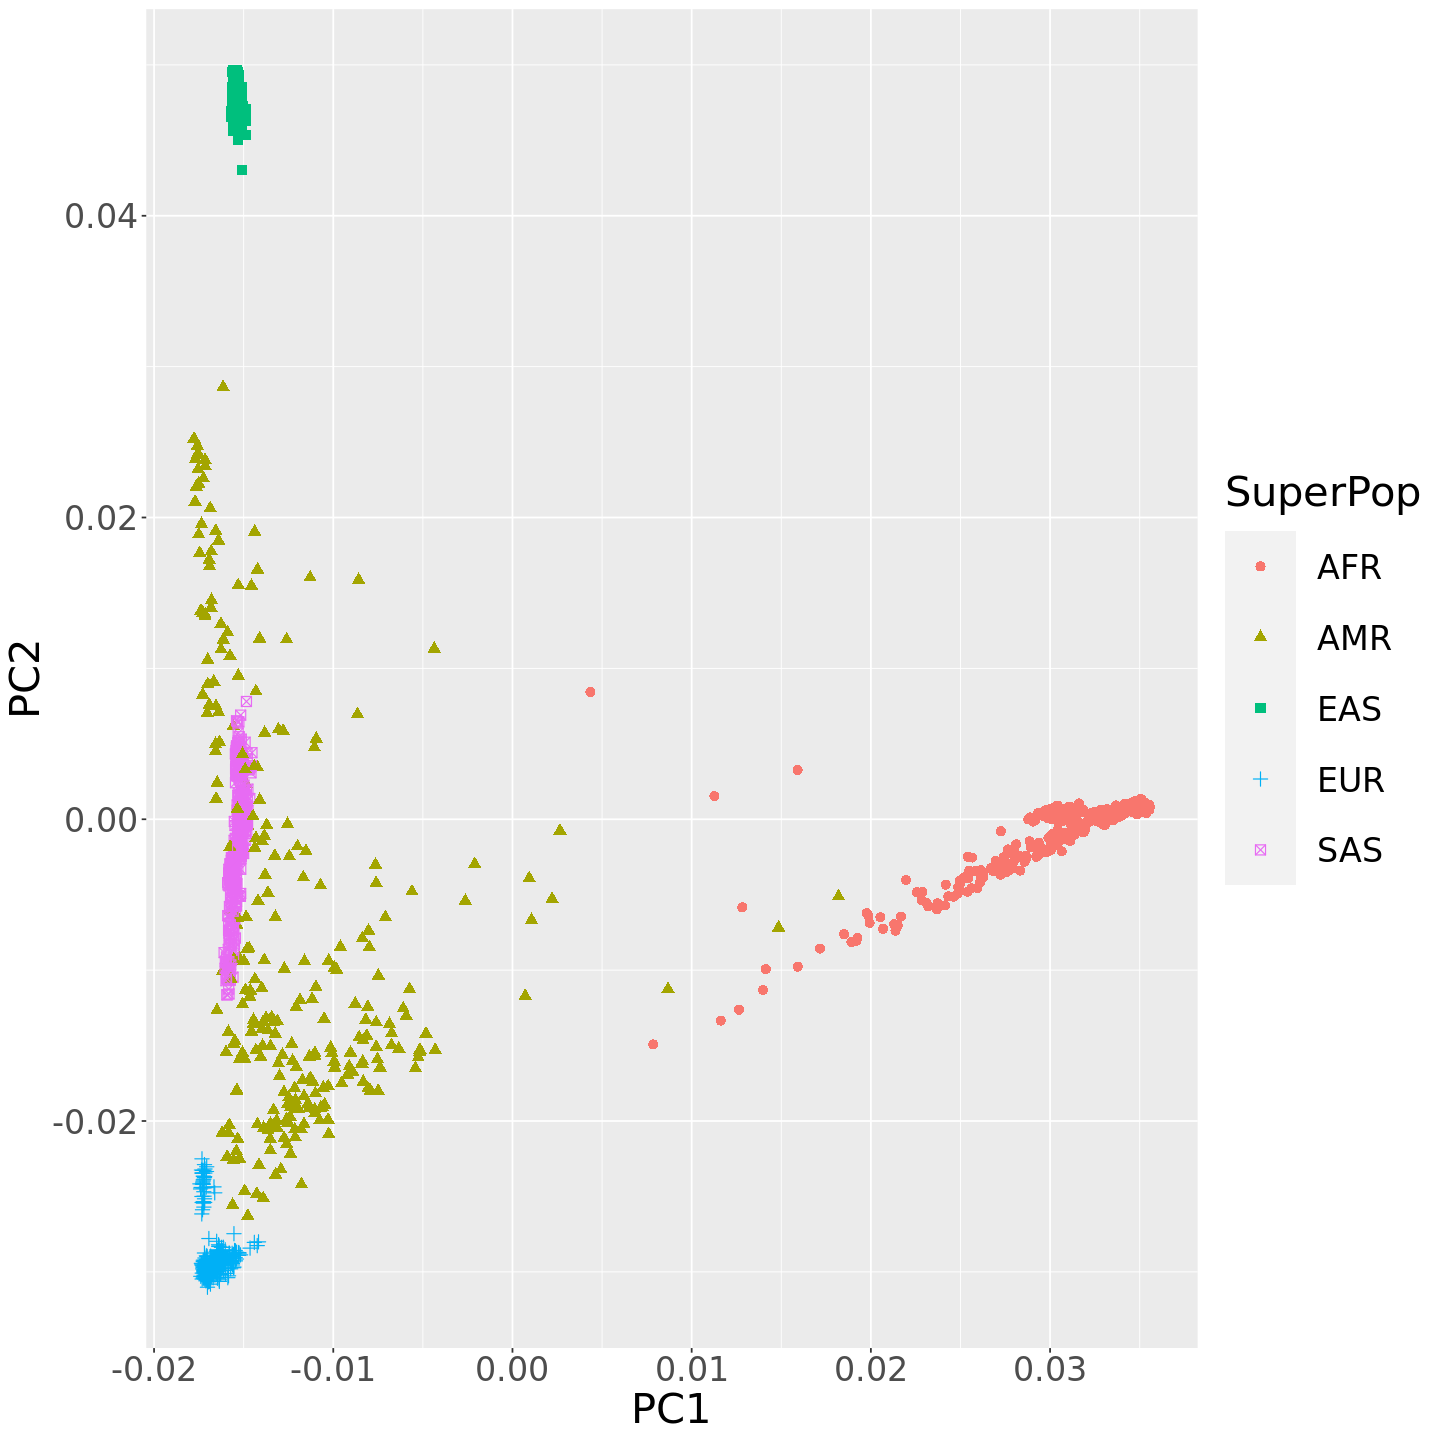

In [19]:
options(repr.plot.width=12, repr.plot.height=12)

datafile %>%
    ggplot(aes(x=PC1, y=PC2, shape=SuperPop, color=SuperPop)) +
    geom_point(size=2.5) +
    theme(text = element_text(size = 25), legend.key.size = unit(1.5, 'cm'))

Here there seems to be two European clusters. I take the biggest one at the very lower left corner.

# Select

Here I manually select threshold for the first two principal components to exclude those samples that are further away from the European ancestry clusters.

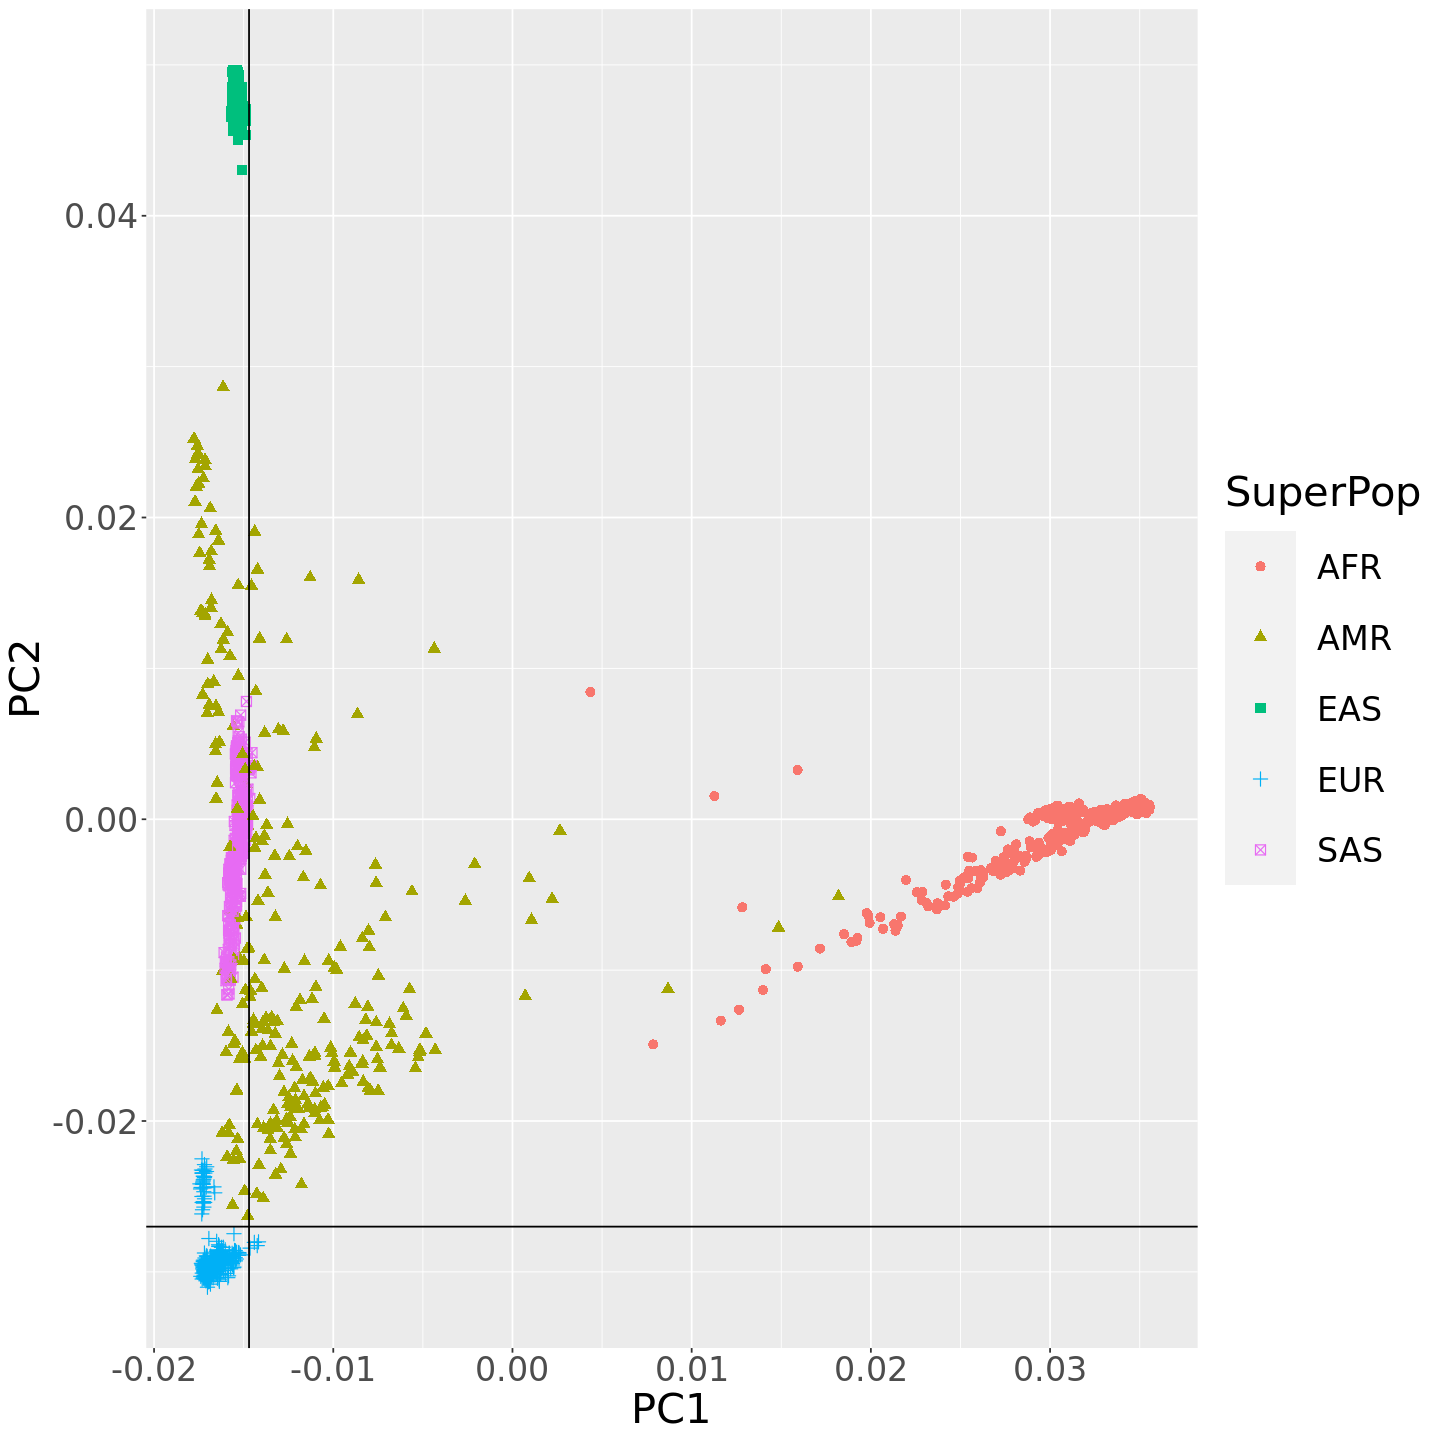

In [20]:
options(repr.plot.width=12, repr.plot.height=12)

datafile %>%
    ggplot(aes(x=PC1, y=PC2, shape=SuperPop, color=SuperPop)) +
    geom_point(size=2.5) +
    geom_vline(aes(xintercept = -0.0147)) +
    geom_hline(aes(yintercept = -0.027)) +
    theme(text = element_text(size = 25), legend.key.size = unit(1.5, 'cm'))

In [21]:
output_file <- datafile %>% filter(PC1 < -0.0147 & PC2 < -0.027) %>% select(FID, IID) %>% rename(`#FID`=FID)

In [22]:
dim(output_file)

[1] 312   2

In [23]:
head(output_file)

,#FID,IID
,<dbl>,<chr>
1,0,HG00096
2,0,HG00100
3,0,HG00101
4,0,HG00102
5,0,HG00103
6,0,HG00105


In [24]:
write_delim(output_file, file.path(SUBSETS_DIR, "all_phase3.6.pca.eur"), delim = " ", quote="none")